Reference: Kaggle https://www.kaggle.com/andypicke/introduction-to-deep-learning-with-keras 

In [13]:
# import libraries
import numpy as np # 
import pandas as pd # 
%matplotlib inline

In [14]:
# load the training data and inspect
digits = pd.read_csv('C:/Users/anubrata/Pictures/MNIST/train.csv')
#digits = pd.read_csv('data/train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# let's look at the structure of one row (image)
a = digits.iloc[3,1:].values
b = a.reshape((28,28))
print(b)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 220 179   6   0   0   0   0   0   0   0   0   9
   77   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  28 247  17   0   0   0   0   0   0   0   0  27
  202   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 242 155   0   0   0   0   0   0   0   0  27
  254  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 207   6   0   0   0   0   0   

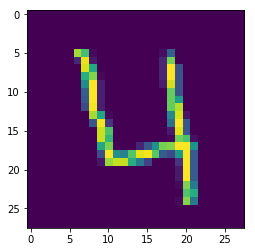

In [4]:
# plot one of the images
import matplotlib.pyplot as plt
plt.imshow(b)

In [5]:
# split the training data into predictors (X) and targets (y)
X=digits.iloc[:,1:].values
y=digits.iloc[:,0].values

# Scale the data to be between 0 and 1 (* this makes big difference in results!*)
X=np.divide(X,255.)

# create dummie variables for the target
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# Now import keras libraries and start building model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [7]:
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(784,)))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# the EarlyStopping stops the model training if it does not improve after 5 epochs
history=model.fit(X,y,validation_split=0.3,callbacks=[EarlyStopping(patience=5)],epochs=50)


Train on 29399 samples, validate on 12601 samples
Epoch 1/50
29399/29399 [==============================] - 5s 182us/step - loss: 0.4228 - acc: 0.8770 - val_loss: 0.2165 - val_acc: 0.9362
Epoch 2/50
29399/29399 [==============================] - 4s 150us/step - loss: 0.1775 - acc: 0.9486 - val_loss: 0.1649 - val_acc: 0.9525
Epoch 3/50
29399/29399 [==============================] - 4s 146us/step - loss: 0.1267 - acc: 0.9623 - val_loss: 0.1393 - val_acc: 0.9594
Epoch 4/50
29399/29399 [==============================] - 4s 146us/step - loss: 0.0929 - acc: 0.9731 - val_loss: 0.1225 - val_acc: 0.9621
Epoch 5/50
29399/29399 [==============================] - 4s 145us/step - loss: 0.0721 - acc: 0.9784 - val_loss: 0.1145 - val_acc: 0.9667
Epoch 6/50
29399/29399 [==============================] - 4s 146us/step - loss: 0.0593 - acc: 0.9820 - val_loss: 0.1352 - val_acc: 0.9607
Epoch 7/50
29399/29399 [==============================] - 4s 146us/step - loss: 0.0461 - acc: 0.9858 - val_loss: 0.1130 - 

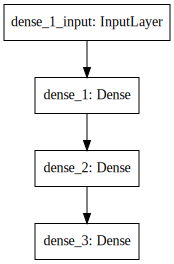

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

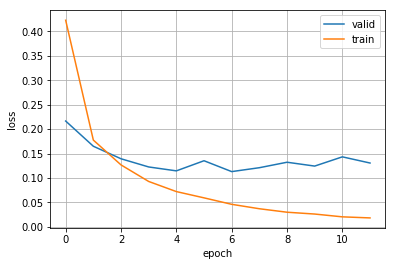

In [8]:
# plot loss vs # model epochs trained
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['valid','train'])

Text(0,0.5,'accuracy')

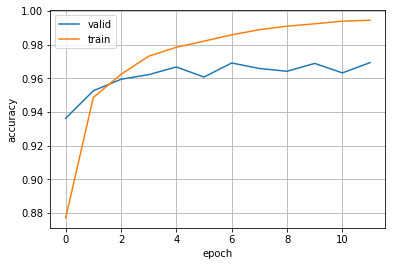

In [9]:
# plot accuracy vs # epochs
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['valid','train'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')